In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msno
import pandas as pd

class AirQualityPredictor:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
    
    def define_problem_statement(self):
        """
        Define the problem statement/business requirement for the air quality predictor.
        """
        print("The goal of this project is to predict the air quality index based on historical air quality data.")
        
    def data_collection(self):
        """
        Load the air quality data from the specified file path into a Pandas DataFrame.
        """
        self.df = pd.read_csv(self.data_path)
        print("Data has been collected and loaded into a pandas DataFrame.")

    def data_remove_unrequired_cols(self):
        columns_to_keep = ['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2',
                'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene',
                'MP-Xylene', 'RH', 'WS', 'WD', 'SR', 'BP', 'Xylene', 'AT', 'RF',
                'TOT-RF']
        self.df = self.df.filter(items=columns_to_keep)
        print("Data has only required columns.")

    def data_cleaning(self):
        """
        Clean the air quality data by removing any missing or duplicate values.
        """
        self.df.dropna(inplace=True)
        self.df.drop_duplicates(inplace=True)
        print("Missing values have been removed from the dataset.")
        
    def data_exploration_analysis(self):
        """
        Explore and analyze the air quality data to gain insights and identify any patterns or relationships.
        """
        # TODO: Add code to explore and analyze the data
        # plot histograms of each feature
        self.df.hist(bins=50, figsize=(20,15))
        plt.show()
        
        # plot correlation matrix
        corr_matrix = self.df.corr()
        fig, ax = plt.subplots(figsize=(12,10))
        ax.matshow(corr_matrix)
        plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
        plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
        plt.show()
        
    def data_modelling(self):
        """
        Build a machine learning model to predict air quality based on the existing data.
        """
        # Split the data into training and testing sets
        X = self.df.drop(columns=['AQI'])
        y = self.df['AQI']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Build and train a linear regression model
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)
        
        # print model coefficients and intercept
        print("Model Coefficients:", self.model.coef_)
        print("Model Intercept:", self.model.intercept_)
        
    def deployment_optimization(self):
        """
        Deploy and optimize the machine learning model by saving it to a file for later use.
        """
        # Make predictions on the test data and calculate the mean squared error
        # make predictions on test set
        y_pred = self.model.predict(self.X_test)
        
        # evaluate model performance
        mse = mean_squared_error(self.y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, y_pred)
        
        print("Mean Squared Error:", mse)
        print("Root Mean Squared Error:", rmse)
        print("R-squared:", r2)
        
        # plot predicted vs actual AQI values
        fig, ax = plt.subplots()
        ax.scatter(self.y_test, y_pred)
        ax.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], 'k--', lw=4)
        ax.set_xlabel('Actual AQI')
        ax.set_ylabel('Predicted AQI')
        plt.show()
    def predict_air_quality(self, input_data):
        """
        Use the trained machine learning model to predict air quality based on the input data.
        """
        # Load the saved model from file
        with open(self.model_file_path, 'rb') as file:
            self.model = pickle.load(file)
            
        # Make a prediction using the input data
        input_data = np.array(input_data).reshape(1, -1)
        prediction = self.model.predict(input_data)
        
        return prediction[0]
    def box_plot(self):
        # Creating plot
        plt.boxplot(self.df)
        # show plot
        plt.show()
    def box_plot_column(self,column_name):
        column_data = self.df[column_name]
        # Create the box plot
        fig, ax = plt.subplots()
        ax.boxplot(column_data)
        # Set labels and title
        ax.set_xlabel(column_name)
        ax.set_ylabel('Value')
        ax.set_title('Box Plot of {}'.format(column_name))
        
        # Show the plot
        plt.show()

    def changes_to_df(self):
        col_list = ["Unnamed: 0", "Unnamed: 25"]
        # df['Unnamed: 25'].value_counts()
        # df['Unnamed: 25'].isnull().sum()
        for col in col_list :
            if col in self.df.columns:
                self.df.drop(col,axis=1,inplace=True)

        self.df.drop("To Date",axis=1,inplace=True)
        self.df.rename(columns={'From Date':'DateTime'},inplace=True)
        self.df['DateTime'].isnull().sum()
        
    def remove_outliers(self):
        # # Calculate the mean and standard deviation of each column
        # mean = self.df.mean()
        # std = self.df.std()
        # for col in columns:
        #     self.df = self.df[np.abs(self.df[col] - mean[col]) <= std_multiplier * std[col]]
        Q1 = self.df.quantile(0.25)
        Q3 = self.df.quantile(0.75)
        IQR = Q3 - Q1
        # Identify the outliers
        outliers = self.df[((self.df < (Q1 - 1.5 * IQR)) | (self.df > (Q3 + 1.5 * IQR))).any(axis=1)]

    def replace_none_with_nan(self):
        # replace None with np.nan
        self.df = self.df.replace('None', np.nan)
        print("Replace None with np.nan.")
    def convert_to_float_type(self):
        # convert to float type
        self.df = self.df.astype({
            'PM2.5': 'float','PM10': 'float','NO': 'float','NO2': 'float','NOx': 'float','NH3': 'float',
            'SO2': 'float','CO': 'float','Ozone': 'float','Benzene': 'float','Toluene': 'float','Eth-Benzene': 'float','MP-Xylene': 'float',
            'RH': 'float','WS': 'float','WD': 'float','SR': 'float','BP': 'float','Xylene': 'float','AT': 'float','RF': 'float','TOT-RF': 'float'
            })
        print("Converted to proper types.")
    def display_missing_value_info(self):
        percentage_missing = (self.df.isnull().sum().sum() / (self.df.shape[0] * self.df.shape[1])) * 100
        print("Percentage of missing values in the self.dfframe: {:.2f}%".format(percentage_missing))
        percentage_missing = (self.df.isnull().sum() / self.df.shape[0]) * 100
        print("Percentage of missing values in each column of the self.dfframe:")
        percentage_missing_sorted = percentage_missing.sort_values(ascending=False)
        print(percentage_missing_sorted)
    def show_missing_value_in_chart(self):
        msno.matrix(self.df)
    def fill_missing_value(self):
        # # fill missing values with the mean value of the column
        # self.df.fillna(self.df.mean(), inplace=True)
        # print("self.dfframe with missing values filled using mean value:")
        # print(self.df)
        # # fill missing values with the median value of the column
        # self.df.fillna(self.df.median(), inplace=True)
        # print("self.dfframe with missing values filled using median value:")
        # print(self.df)
        # # fill missing values with a forward fill
        # self.df.fillna(method='ffill', inplace=True)
        # print("self.dfframe with missing values filled using a forward fill:")
        # print(self.df)
        # # fill missing values with a backward fill
        # self.df.fillna(method='bfill', inplace=True)
        # print("self.dfframe with missing values filled using a backward fill:")
        # print(self.df)
        # fill missing values using linear interpolation for all columns
        self.df.interpolate(method='linear', inplace=True)
        print("self.dfframe with missing values filled using interpolation:")
        # print(self.df)

    def convert_to_hourly_data(self):
        # drop 'To Date' column
        self.df.drop("To Date",axis=1,inplace=True)
        # self.df.rename(columns={'From Date':'DateTime'},inplace=True)
        # # set 'DateTime' column as index
        # self.df.set_index('DateTime', inplace=True)
        self.df['date'] = pd.to_datetime(self.df['From Date'], format='%d-%m-%Y %H:%M')
        # set the date column as the index of the dataframe
        self.df = self.df.set_index('date')
        # resample data to hourly intervals
        self.df = self.df.resample('1H').mean()
        print("Converted to hourly data")



In [2]:
# folder_path = '..\\..\\data\\notion\\'
folder_path = '..//..//data//notion//'
folder_path = "D:\\MI-AI\\omdena\\omd-jg\\omd-bkup\\src\\data\\notion\\"
file_path = folder_path + 'BandraKurlaComplexMumbaiIITM.csv'

In [3]:
# Create an instance of the AirQualityPredictor class
predictor = AirQualityPredictor(file_path)

# Define the problem statement
predictor.define_problem_statement()

# Collect the data from a file
predictor.data_collection()

# # replace None with np.nan
# predictor.replace_none_with_nan()


The goal of this project is to predict the air quality index based on historical air quality data.
Data has been collected and loaded into a pandas DataFrame.


In [4]:
predictor.data_remove_unrequired_cols()

Data has only required columns.


In [5]:

# replace None with np.nan
predictor.replace_none_with_nan()

# convert to float type
predictor.convert_to_float_type()

# display missing value information
predictor.display_missing_value_info()


Replace None with np.nan.
Converted to proper types.
Percentage of missing values in the self.dfframe: 28.78%
Percentage of missing values in each column of the self.dfframe:
SR             100.000000
AT              44.066688
NO              32.528277
NH3             32.295521
SO2             31.943772
NO2             31.822164
NOx             31.691402
MP-Xylene       30.812684
Eth-Benzene     29.612292
Ozone           28.907486
PM10            28.846028
CO              28.601504
PM2.5           28.465512
WS              26.833606
WD              26.663616
RH              26.409938
BP              26.334096
RF              26.290945
Xylene          26.228179
Toluene         26.217718
Benzene         26.106571
From Date        0.000000
To Date          0.000000
TOT-RF           0.000000
dtype: float64


In [6]:
predictor.df['PM2.5'].describe()

count    54706.000000
mean        67.099262
std         63.725961
min          0.100000
25%         26.270000
50%         51.780000
75%         86.790000
max        991.870000
Name: PM2.5, dtype: float64

In [7]:
# predictor.remove_outliers()
# predictor.df['PM2.5'].describe()

In [8]:
# columns_to_keep = ['PM2.5', 'PM10', 'NO', 'NO2',
#                 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene',
#                 'MP-Xylene', 'RH', 'WS', 'WD', 'SR', 'BP', 'Xylene', 'AT', 'RF',
#                 'TOT-RF']
#outlier function not working properly
# predictor.remove_outliers(columns_to_keep)
df = predictor.df


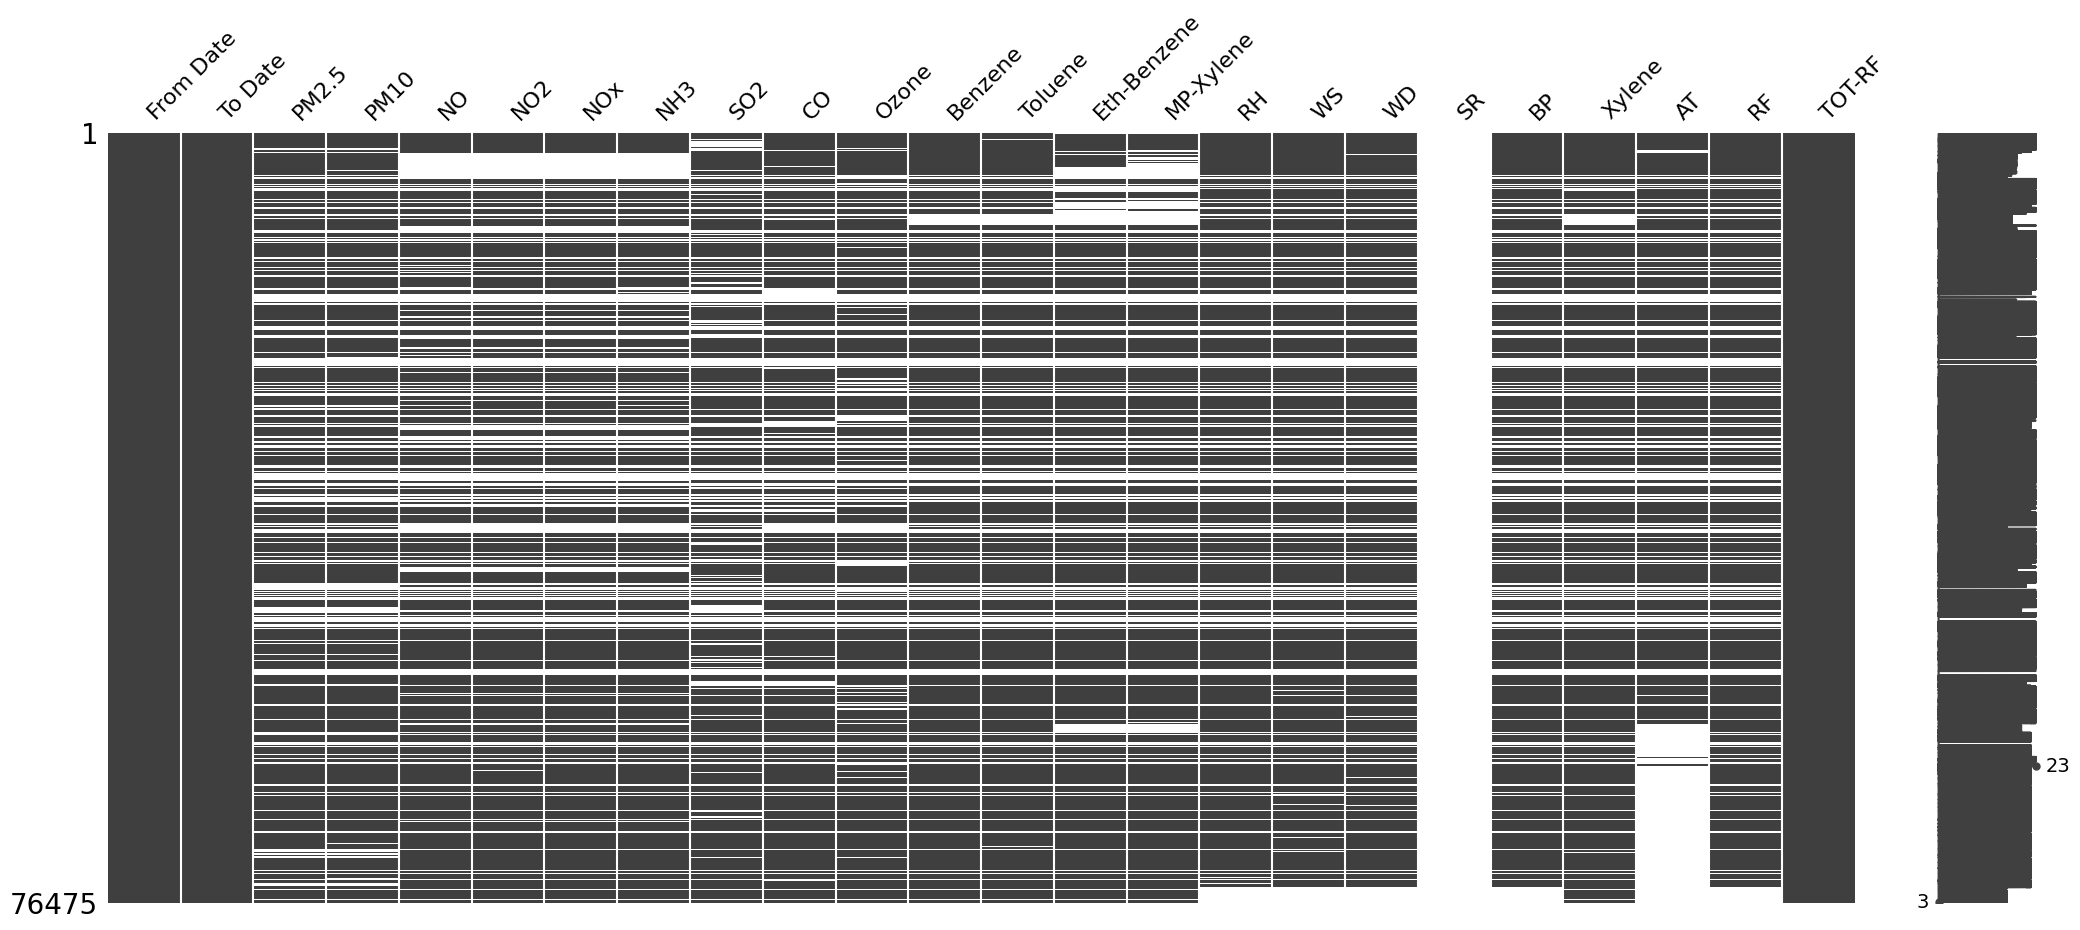

In [9]:
# display missing value information
predictor.show_missing_value_in_chart()

In [10]:
# display missing value information
predictor.fill_missing_value()

self.dfframe with missing values filled using interpolation:


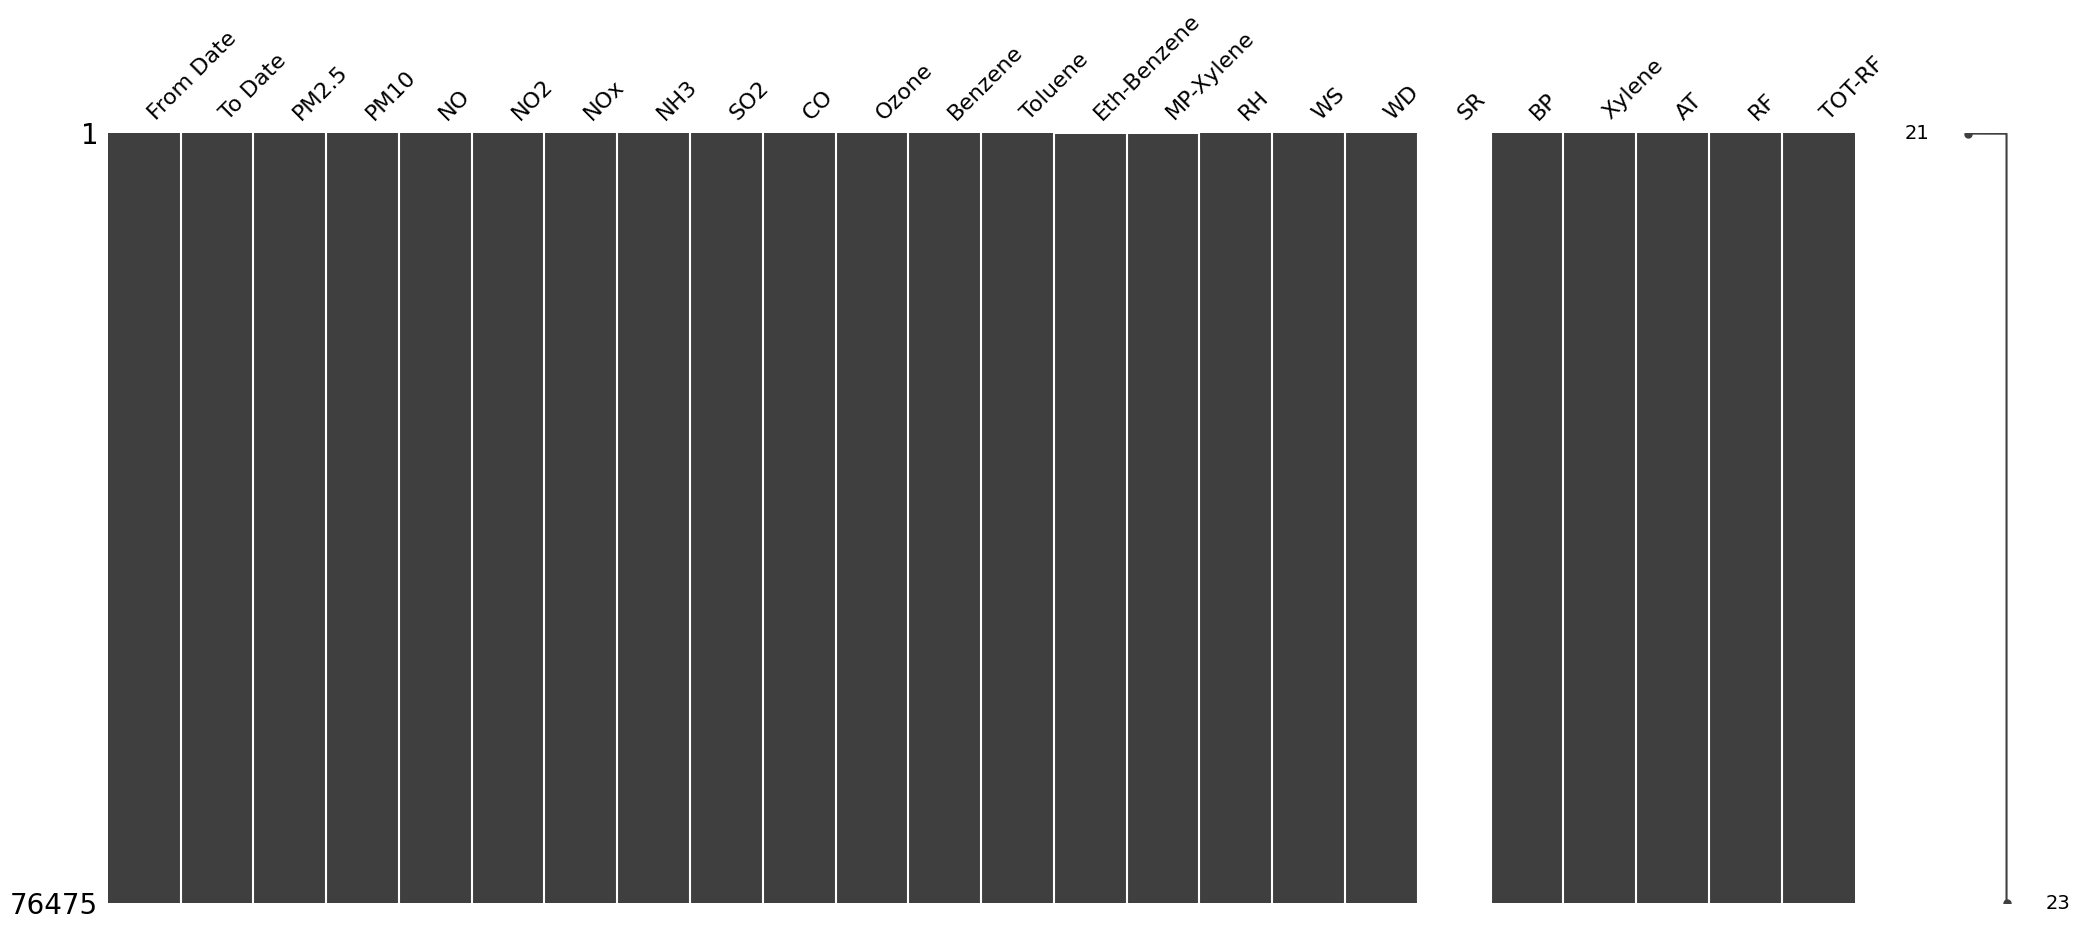

In [11]:
# display missing value information
predictor.show_missing_value_in_chart()

In [12]:
df = predictor.df
df.head(2)

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,MP-Xylene,RH,WS,WD,SR,BP,Xylene,AT,RF,TOT-RF
0,01-01-2021 00:00,01-01-2021 00:15,147.26,175.93,16.23,61.72,45.30,79.76,4.68,1.38,...,NaN,94.14,0.46,187.53,NaN,953.2,0.0,21.84,0.0,0.0
1,01-01-2021 00:15,01-01-2021 00:30,145.37,173.96,16.88,61.50,45.75,79.01,18.49,1.38,...,NaN,94.99,0.47,224.11,NaN,953.2,0.0,21.84,0.0,0.0


In [13]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene',
       'RH', 'WS', 'WD', 'SR', 'BP', 'Xylene', 'AT', 'RF', 'TOT-RF'],
      dtype='object')

In [14]:
# # convert to hourly data
# predictor.convert_to_hourly_data()

In [15]:

# # # Clean the data
# # predictor.data_cleaning()
# # Changes_to_df
# predictor.changes_to_df()

# # # Explore and analyze the data
# # predictor.data_exploration_analysis()

# # # Build a machine learning model
# # predictor.data_modelling()

# # # deployment and optimization
# # predictor.deployment_optimization()

# # # remove outliers
# # predictor.remove_outliers([ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
# #        'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS',
# #        'WD', 'SR', 'BP', 'Xylene', 'AT', 'RF', 'TOT-RF'])

In [16]:
df = predictor.df

In [17]:
# # remove outliers
# predictor.remove_outliers([ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
#        'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS',
#        'WD', 'SR', 'BP', 'Xylene', 'AT', 'RF', 'TOT-RF'])



In [18]:
# predictor.df.info()

In [19]:
# df = predictor.remove_outliers([ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
#        'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS',
#        'WD', 'SR', 'BP', 'Xylene', 'AT', 'RF', 'TOT-RF'])


In [20]:
# fig, ax = plt.subplots()
# predictor.df[[ 'PM2.5', 'PM10', 'NO', 'NO2']].boxplot(ax=ax)
# plt.show()